<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/Week%204/Aryan_Shukla_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting drive for dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/input/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Taking Sample from dataframe

In [ ]:
df.sample(5)

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
576813,NaN,2.415111,0.145358,5.626887,267.202657,36.558310,2.064055,2.766167,3.753305,3433.0,...,NaN,NaN,NaN,NaN,NaN,1.051060,MBA,0.262602,1370.894537,149.559764
747893,NaN,3.171601,0.205167,16.689887,82.799408,89.897695,2.520892,3.822309,5.648406,88.0,...,NaN,NaN,NaN,NaN,NaN,1.594360,MBA,0.174496,2063.080370,279.684430
181534,NaN,3.053619,0.139951,13.540185,196.272004,283.527406,2.626262,3.480975,5.336179,8589.0,...,NaN,NaN,NaN,NaN,NaN,1.682080,MBA,0.184706,1949.039365,54.758040
258548,NaN,2.741857,0.213467,8.331920,240.512884,262.315479,2.156560,3.327154,4.540205,6123.0,...,NaN,NaN,NaN,NaN,NaN,1.188480,MBA,0.217088,1658.309975,282.916028
738989,NaN,2.352620,0.196887,3.654694,259.485420,313.028475,1.889421,2.815819,3.608576,34.0,...,NaN,NaN,NaN,NaN,NaN,0.885697,MBA,0.273134,1318.032291,357.416329


### Details of Some Columns
- name- Name of asteroids
- a - Semi major axis
- e - eccentricity
- i - inclination with respect to x-y elliptical plane
- om - longitude of the ascending node
- w - argument of perihelion
- q - perihelion distance
- ad - aphelion distance
- per_y - orbital period
- data_Arc - data arc span(d)
- condition_Code = orbit condition code
- n_obs_used - number of observation used
- H - absolute magnitude parameter
- neo-Near earth object
- pha - Physically hazardous object
- diameter - diameter of asteroids
- extent - Object bi/tri axial ellipsoid dimensions(Km)
- albedo - geometric albedo
- rot_per - rotation period

In [ ]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']
No. of variables are 31


### There are entries with null diameters

In [ ]:
# for an instance 
df[df['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [ ]:
print("Entries with null diameter are :", df['diameter'].isnull().sum())
print("Entries with not null diameter are :", df['diameter'].notnull().sum())

Entries with null diameter are : 702078
Entries with not null diameter are : 137636


- __Cleaning__:
<br/> 
__Problem__: 'diameter' is string type, I will convert to numeric. This gave errors for some diameters because they were corrupted, so I added the argument "errors='coerce'" to set corrupted diameters to nan, and later dropped those.
<br/> 
Dropping irrelevent features and choosing my battles:
<br/> 
dropping names because I dont believe asteroids are useful feature.
<br/> 
Dropping all features with more than half nan values
<br/> 
dropping condition_code and neo and pha because most seems to be 0 or nan.
<br/> 
Replace nans entries with mean value of column

In [ ]:
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce') #transforming to numeric, setting errors to NaN
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df=df[df['diameter'].notnull()]

In [ ]:
# after dropping the NaN val
print(df.shape)

(137635, 31)


In [ ]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']
No. of variables are 31


In [ ]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code'],axis=1)
df = df.drop(['neo','pha'],axis=1)

In [ ]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,class,n,per,ma
22635,2.591678,0.089590,21.283603,289.277621,132.674053,2.359488,2.823867,4.172340,9192.0,945,13.9,4.481,0.266,1.41009,MBA,0.236229,1523.947232,225.079228
160417,3.154654,0.216210,26.612573,298.779821,308.778760,2.472587,3.836720,5.603195,9422.0,335,14.7,6.635,0.058,1.52891,MBA,0.175904,2046.566971,79.923291
59387,2.397242,0.120049,4.134793,47.155460,204.668767,2.109455,2.685029,3.711728,7527.0,901,15.4,1.970,0.345,1.09583,MBA,0.265544,1355.708484,94.133929
64145,2.418774,0.033655,5.276376,311.793097,290.542385,2.337370,2.500178,3.761847,7566.0,834,15.2,2.172,0.341,1.32956,MBA,0.262006,1374.014449,47.058035
97522,3.075731,0.225468,6.020892,336.597608,62.393682,2.382252,3.769209,5.394245,7650.0,749,14.8,3.917,0.182,1.39646,MBA,0.182718,1970.247862,278.239613


In [ ]:
df = df.drop(['albedo','H','class'],axis = 1)

In [ ]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,diameter,moid,n,per,ma
32047,2.371600,0.169259,1.495554,301.560263,286.845919,1.970186,2.773014,3.652333,9603.0,1273,2.726,0.960847,0.269862,1334.014647,71.002971
3385,2.839267,0.087084,2.163163,168.431047,214.297077,2.592012,3.086523,4.784291,25477.0,2313,8.624,1.594530,0.206013,1747.462438,214.188409
242377,3.064365,0.037899,9.961771,169.306533,121.867559,2.948228,3.180501,5.364372,8122.0,264,4.089,1.946530,0.183736,1959.336839,161.995749
623593,1.996282,0.490809,7.378324,147.254443,99.756487,1.016489,2.976076,2.820597,174.0,111,0.134,0.112696,0.349439,1030.223186,56.287400
59907,3.222826,0.059432,2.562852,284.150268,122.218575,3.031285,3.414366,5.785800,7227.0,1411,11.039,2.041220,0.170353,2113.263397,84.771829


In [ ]:
# As discussed in meet some features are in form e^x so taking log to find trend in diameter
df['diameter']= df['diameter'].apply(np.log)
for column in df.columns.drop(['diameter']):
    if(column != "class"):
      df['log('+column+')']=df[column].apply(np.log)
df = df.dropna(axis=1)


In [ ]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
390985,3.120430,0.147507,0.871788,159.831372,163.756897,2.660145,3.580716,5.512263,6296.0,95,...,5.098383,0.978381,1.275563,1.706975,8.747670,4.553877,0.498968,-1.721453,7.607557,5.297297
255494,3.201952,0.012948,6.471181,112.111422,248.089864,3.160494,3.243409,5.729680,6228.0,325,...,5.513791,1.150728,1.176625,1.745660,8.736811,5.783825,0.769122,-1.760138,7.646242,5.377634
274944,2.706319,0.191707,6.647928,176.886018,208.855825,2.187499,3.225140,4.452221,9976.0,179,...,5.341644,0.782759,1.170976,1.493403,9.207937,5.187386,0.176580,-1.507881,7.393985,3.894306
162128,2.753721,0.220809,8.946239,352.053128,27.657354,2.145675,3.361767,4.569704,7534.0,424,...,3.319892,0.763454,1.212467,1.519448,8.927181,6.049733,0.140640,-1.533926,7.420030,5.149772
83730,3.147235,0.104744,22.422396,241.597979,99.601772,2.817581,3.476890,5.583442,7205.0,662,...,4.601180,1.035879,1.246138,1.719805,8.882531,6.495266,0.650511,-1.734283,7.620387,4.678782


In [ ]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'diameter', 'moid', 'n', 'per', 'ma', 'log(a)', 'log(e)', 'log(i)', 'log(om)', 'log(w)', 'log(q)', 'log(ad)', 'log(per_y)', 'log(data_arc)', 'log(n_obs_used)', 'log(moid)', 'log(n)', 'log(per)', 'log(ma)']
No. of variables are 29


### Correlation analysis

In [ ]:
df.corr()['diameter'].abs().sort_values(ascending=False)

diameter           1.000000
log(a)             0.563616
log(per_y)         0.563616
log(n)             0.563616
log(per)           0.563616
log(q)             0.543737
log(moid)          0.528689
n                  0.525392
q                  0.522404
moid               0.521095
data_arc           0.519390
n_obs_used         0.511250
log(ad)            0.477252
log(n_obs_used)    0.433656
log(data_arc)      0.298793
a                  0.195634
e                  0.185047
log(e)             0.157921
ad                 0.112606
i                  0.096037
log(i)             0.088749
per                0.046649
per_y              0.046649
ma                 0.030946
log(ma)            0.023154
log(w)             0.006008
w                  0.005310
om                 0.001478
log(om)            0.000169
Name: diameter, dtype: float64

### Splitting

In [ ]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
190047,2.691591,0.159076,10.514022,310.904702,332.068821,2.263424,3.119759,4.415927,6204.0,418,...,5.805342,0.816879,1.137756,1.485218,8.732950,6.035481,0.224926,-1.499696,7.385800,5.173569
73703,3.238780,0.050928,12.132893,50.964753,31.490943,3.073834,3.403726,5.828816,9739.0,339,...,3.449700,1.122926,1.224871,1.762814,9.183894,5.826000,0.739525,-1.777292,7.663396,5.378602
169452,2.165836,0.135894,3.180385,59.247435,305.551409,1.871512,2.460159,3.187473,5900.0,639,...,5.722118,0.626747,0.900226,1.159228,8.682708,6.459904,-0.138176,-1.173706,7.059810,5.562007
141089,3.124666,0.232717,16.493446,58.117920,83.250873,2.397504,3.851827,5.523489,6802.0,895,...,4.421859,0.874428,1.348548,1.709010,8.824972,6.796824,0.390331,-1.723488,7.609592,3.274327
47041,2.931241,0.065307,3.273030,107.609714,329.997799,2.739811,3.122670,5.018633,8718.0,963,...,5.799086,1.007889,1.138689,1.613158,9.073145,6.870053,0.562885,-1.627636,7.513740,3.568334


### Normalization

In [ ]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

### Trying Linear Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.67
rms value for the regression  : 0.321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


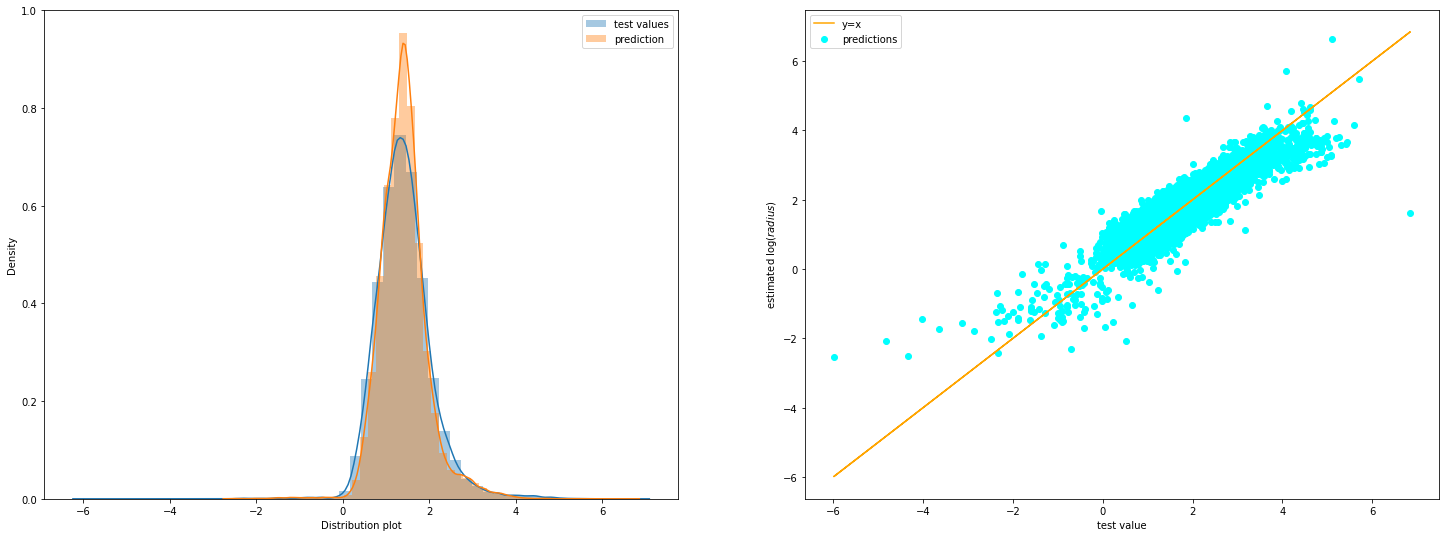

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Trying XGBoost

In [ ]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test_norm)

### Scoring
score_xgb = r2_score(Y_pred_xgb,Y_test)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.737
rms value for the regression  : 0.393


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


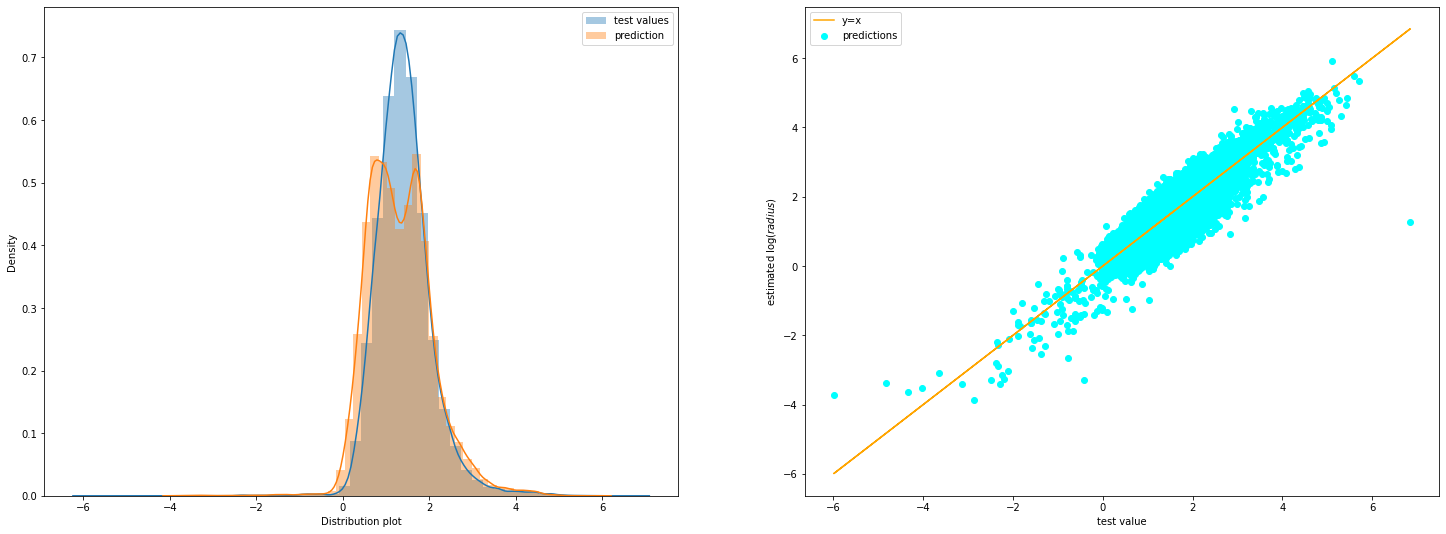

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_xgb ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_xgb, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### SVM

In [ ]:
from sklearn import svm
svmreg = svm.SVR()

### Training
svmreg.fit(X_train_norm,np.ravel(Y_train))

### Predicting
Y_pred_svm = svmreg.predict(X_test_norm)
### Scoring
score_svm = r2_score(Y_pred_svm,Y_test)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.681
rms value for the regression  : 0.311


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


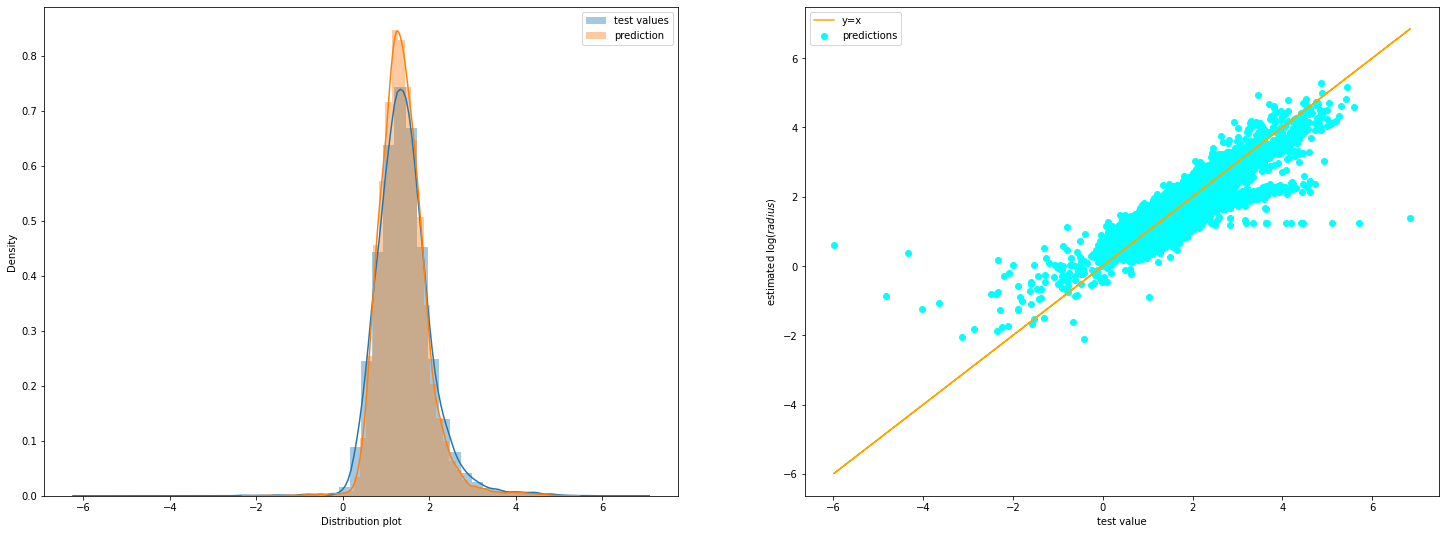

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_svm ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_svm, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Decision tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=0)

### Training
treereg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_tree = treereg.predict(X_test_norm)
### Scoring
score_tree = r2_score(Y_pred_tree,Y_test)
print("R^2 value for the regression  :",  round(score_tree,3))
rms = mean_squared_error(Y_test, Y_pred_tree, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.623
rms value for the regression  : 0.436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


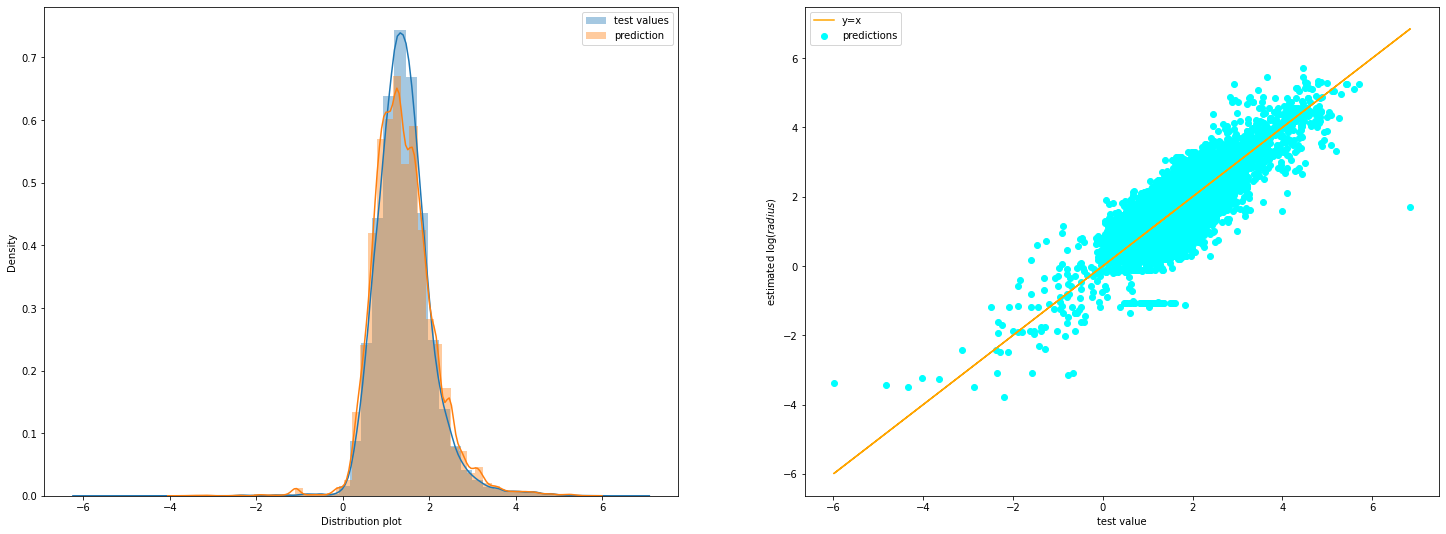

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_tree ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_tree, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Random Forest regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=32, n_estimators=50)

### Training
forest.fit(X_train_norm,Y_train)

### Predicting
Y_pred_forest = forest.predict(X_test_norm)
### Scoring
score_forest = r2_score(Y_pred_forest,Y_test)
print("R^2 value for the regression  :",  round(score_forest,3))
rms = mean_squared_error(Y_test, Y_pred_forest, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.803
rms value for the regression  : 0.279


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


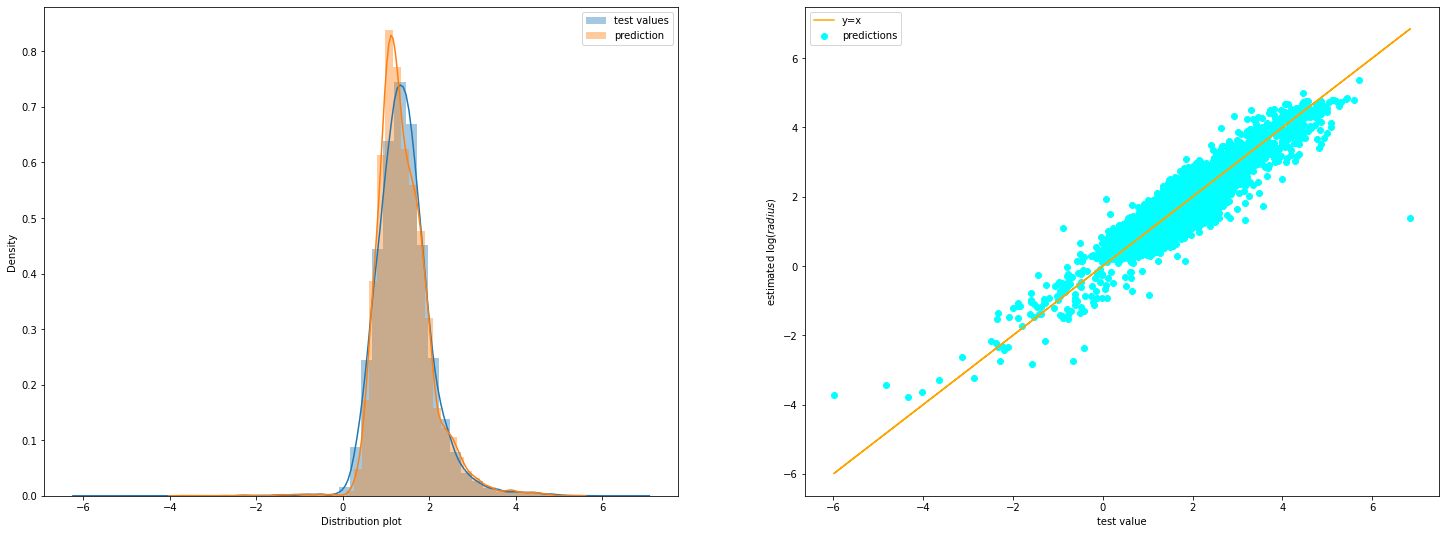

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_forest ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_forest, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Neural Network regression

In [63]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Adam(learning_rate=0.005)
model = Sequential()
model.add(Dense(24,activation='tanh',input_dim=X_train_norm.shape[1]))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

### Training
model.fit(X_train_norm,Y_train,epochs=100,batch_size=256,verbose=False)

### Predicting
Y_pred_nn = model.predict(X_test_norm)

### Scoring
score_nn = r2_score(Y_pred_nn,Y_test)
print("R^2 value for the regression  :",  round(score_nn,3))
rms = mean_squared_error(Y_test, Y_pred_nn, squared=False)
print("rms value for the regression  :",  round(rms,3))

861/861 [==============================] - 2s 2ms/step
R^2 value for the regression  : 0.497
rms value for the regression  : 0.407


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


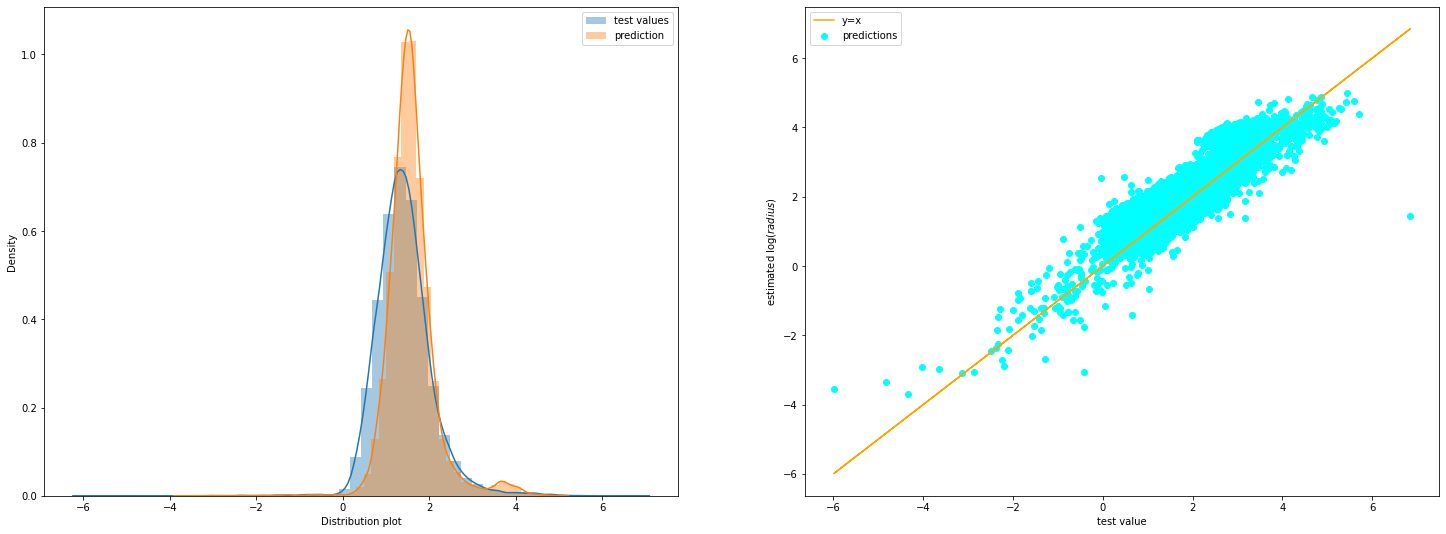

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_nn ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_nn, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Bagging

In [65]:
from sklearn.ensemble import BaggingRegressor
baggreg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)

### Training
baggreg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_bagg = baggreg.predict(X_test_norm)
### Scoring
score_bagg = r2_score(Y_pred_bagg,Y_test)
print("R^2 value for the regression  :",  round(score_bagg,3))
rms = mean_squared_error(Y_test, Y_pred_bagg, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.788
rms value for the regression  : 0.286


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


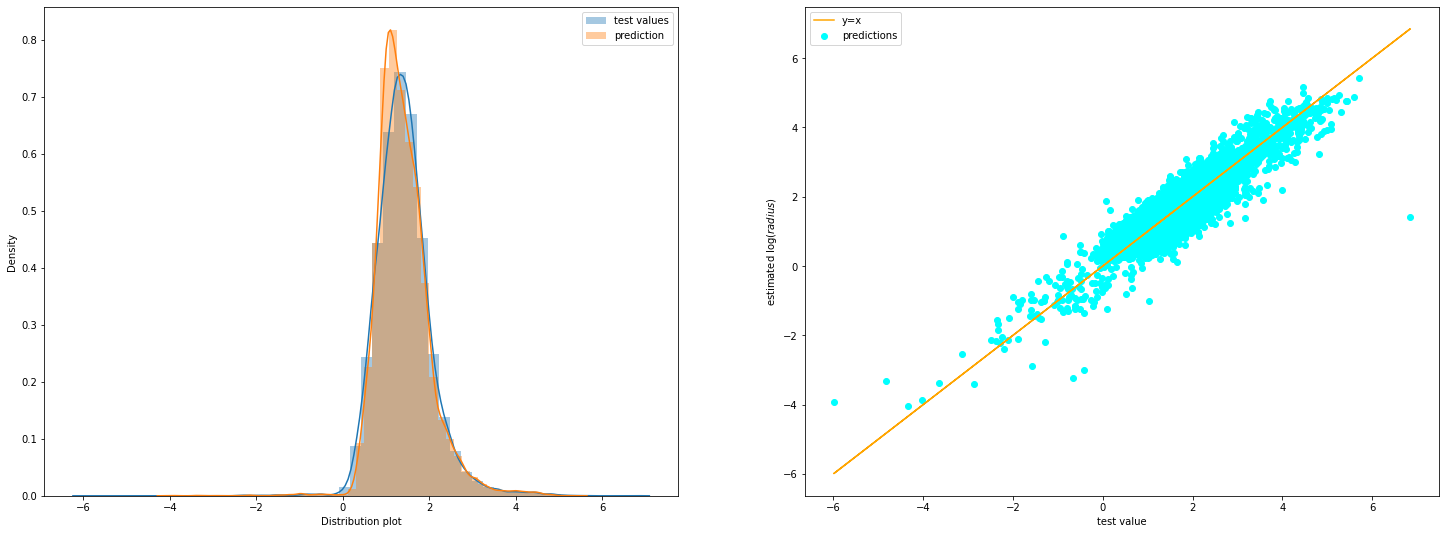

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_bagg ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_bagg, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
boostreg = GradientBoostingRegressor(random_state=0)

### Training
boostreg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_boost = boostreg.predict(X_test_norm)
### Scoring
score_boost = r2_score(Y_pred_bagg,Y_test)
print("R^2 value for the regression  :",  round(score_boost,3))
rms = mean_squared_error(Y_test, Y_pred_boost, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.788
rms value for the regression  : 0.319


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


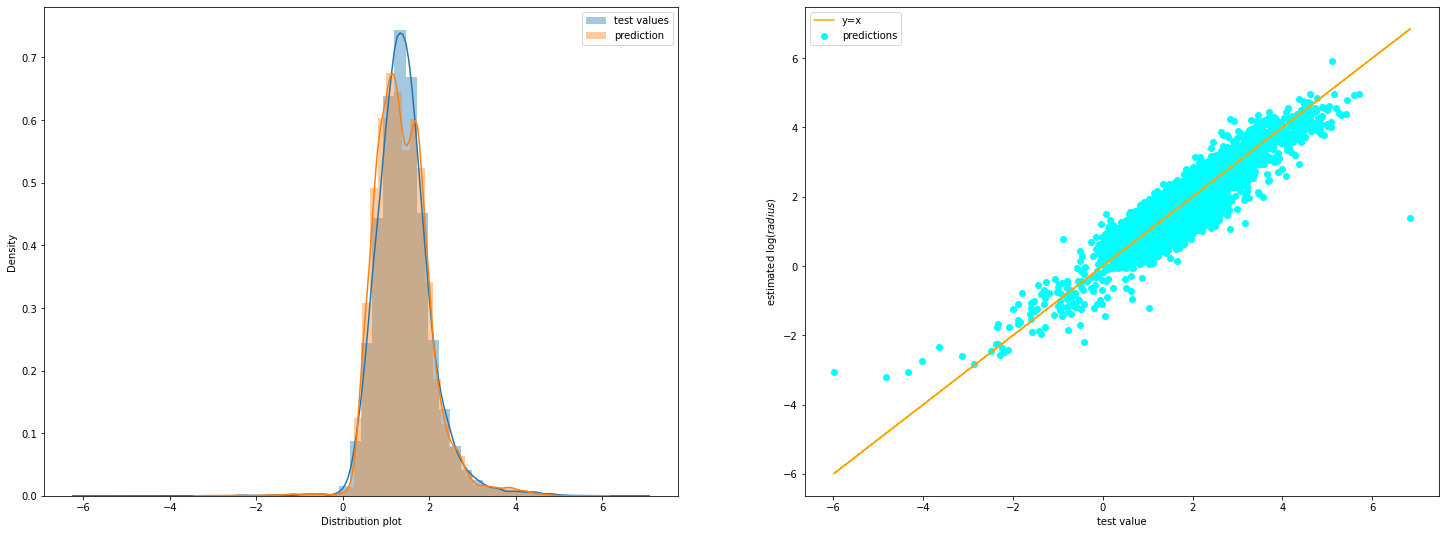

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_boost ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_boost, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()